<a href="https://colab.research.google.com/github/CurdtMillion/DS-Unit-1-Sprint-2-Statistics/blob/master/LS_DS_122_Sampling_Confidence_Intervals_and_Hypothesis_Testing_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


In [0]:
import pandas as pd
from scipy import stats
from scipy.stats import ttest_ind, ttest_ind_from_stats, ttest_rel
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data

--2020-02-03 01:04:20--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data.3’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.06s   

2020-02-03 01:04:21 (278 KB/s) - ‘house-votes-84.data.3’ saved [18171/18171]



In [0]:
# TODO - your code!
from scipy.stats import ttest_1samp
import numpy as np
import matplotlib.pyplot as plt

# Creating column headers
column_headers = ['party', 'handicapped-infants', 'water-project',
                  'budget', 'physician-fee-freeze', 'el-salvador-aid',
                  'religious-group', 'anti-satellite-ban', 
                  'aid-to-contras', 'mx-missle', 'immigration', 'synfuels', 
                  'education', 'right-to-sue-', 'crime', 'duty-free',
                  'south-africa']

df = pd.read_csv('house-votes-84.data',
                 header=None,
                 names=column_headers,
                 na_values='?')
df.shape

(435, 17)

In [0]:
# Clean data
df = df.replace({'y':1, 'n': 0})
df.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-group,anti-satellite-ban,aid-to-contras,mx-missle,immigration,synfuels,education,right-to-sue-,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [0]:
# Create the subsets of data for reps and dems
rep = df[df['party']=='republican']
dem = df[df['party']=='democrat']

In [0]:
# Defining a function
def confidence_interval(data, confidence=0.95):
    """
    Calculate a confidence interval around a sample mean for given data.
    Using t-distribution and two-tailed test, default 95% confidence. 

    Arguments:
    data - iterable (list or numpy array) of sample observations
    confidence - level of confidence for the interval

    Returns:
    tuple of (mean, lower bound, upper bound)
    """
    data_array = np.array(data)
    data_array = data_array[~np.isnan(data)]
    data_mean = np.nanmean(data)
    n = len(data)
    stderr = np.std(data_array, ddof=1)/np.sqrt(n)
    moe = stderr * stats.t.ppf((1 + confidence) / 2, n-1)
    return (data_mean, data_mean - moe, data_mean + moe)


In [0]:
ttest_ind(rep['budget'], dem['budget'], nan_policy='omit').pvalue < 0.05

True

In [0]:
confidence_interval(dem['budget'])
# I can see that the MOE is +/- .04, where the about 95% of the democrat voting
# mass voted yes

(0.8884615384615384, 0.8504564817145478, 0.926466595208529)

In [0]:
# Question 2 plot CI
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


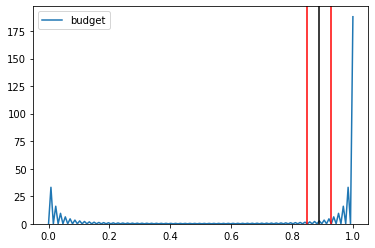

In [0]:
sns.kdeplot(dem['budget'])
CI = confidence_interval(dem['budget'])
plt.axvline(x=CI[1], color='r')
plt.axvline(x=CI[2], color='r')
plt.axvline(x=CI[0], color='k');

In [0]:
# Question number 3
# I can see that the MOE is +/- .04, where the about 95% of the democrat voting
# mass voted yes on the budget bill. But the graph is still a little iffy.

In [0]:
# Take a dataset that we have used in the past in class that has categorical 
# variables. Pick two of those categorical variables and run a chi-squared tests on that data
# By hand using Numpy and In a single line using Scipy

# Titanic data set

from scipy.stats import ttest_ind, ttest_1samp, chisquare, normaltest, t, chi2_contingency
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url = 'https://raw.githubusercontent.com/austinlasseter/pandas_visualization/master/data/titanic.csv'
boat_df = pd.read_csv(url)
boat_df.describe(exclude='number')



In [4]:
# Get observed data

observed = pd.crosstab(boat_df['Sex'], boat_df['Embarked']).values
observed


array([[ 61,  12, 186],
       [ 69,  16, 368]])

In [8]:
# Make cross tab
boat_xtable = pd.crosstab(boat_df['Sex'], boat_df['Embarked'], margins=True)
boat_xtable
# Get the expected data:

# Get the row summaries
row_sums = boat_xtable.iloc[0:2,3].values #rows 0 -2 in the 3rd column
print(row_sums)
# Column Summaries
column_sums = boat_xtable.iloc[2, 0:3].values
print(column_sums)

[259 453]
[130  28 554]


In [9]:
# Total using loc
total = boat_xtable.loc['All', 'All']
total

712

In [0]:
# Double For Loop
expected = []
for i in range(len(row_sums)):
  expected_row = []
  for column in column_sums:
    expected_val = column*row_sums[i]/total
    expected_row.append(expected_val)
  expected.append(expected_row)
expected = np.array(expected)


In [11]:
# Expected distribution

print(expected[0])
print(expected[1])

[ 47.28932584  10.18539326 201.5252809 ]
[ 82.71067416  17.81460674 352.4747191 ]


In [12]:
# Compare boat xtable with expected
boat_xtable

Embarked,Cherbourg,Queenstown,Southampton,All
Sex,,,,
female,61,12,186,259
male,69,16,368,453
All,130,28,554,712


In [13]:
# Chi squared
chi_squared_stat = ((observed - expected)**2/(expected)).sum()
chi_squared_stat

8.635939718372466

In [14]:
# DoF
dof = (len(row_sums)-1)*(len(column_sums)-1)
dof

2

In [15]:
# SciPy Chi Test
chi2_contingency(observed)

(8.635939718372466,
 0.013326911604945089,
 2,
 array([[ 47.28932584,  10.18539326, 201.5252809 ],
        [ 82.71067416,  17.81460674, 352.4747191 ]]))

## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)